# FBI Hate Crimes in USA 🇺🇸

America has a history with prejudice that is as long as it is sordid. That prejudice takes many forms; whether it’s based on race, gender, or sexuality. And whether or not we want to admit it, that history is not far behind us.
Prejudice manifests itself in the United States in many ways, but one of the most violent and dangerous ways it manifests in our country is through Hate Crimes.

According to The Hate Crime Statistics Program of the FBI’s Uniform Crime Reporting (UCR) Program, Hate Crimes are criminal offenses that were motivated, in whole or in part, by the offender’s bias against a race, gender, gender identity, religion, disability, sexual orientation, or ethnicity, and were committed against persons, property, or society.

Hate crimes have varying levels of severity, ranging from Intimidation to Aggravated Assault, and sometimes--as in the cases of the tragic deaths of Matthew Shepard, Breonna Taylor, and George Floyd--murder.


The dataset provides information about differing hate crime incidents from 1991 to 2018. This data set includes the date, state, offender race, victim count, type of offense, etc. The data ranges from the year 1991 to 2018, allowing room for you to analyze and answer different questions.

# Goal

The main focus of this project is to Analyze the ways in which hate crimes have behaved over the past few decades in the United States, in the hopes that our findings--whatever they may be--will raise awareness to the serious issues that make up the subject matter of this analysis.


# Business Task

Gain insight into the behavior of hate crime rates in the United States over the past few decades by answering the following questions:

    > How has the rate of hate crimes behaved in America from 1991-2018? Has it increased? decreased?
    > What types of hate crimes were most common from 1991-2018?
    > How many hate crimes were committed against each group from 1991-2018?
    > Which presidential administration had the highest/lowest hate crime incidents?
    > Which states–if any–had the highest amount of total hate crimes committed?



#  Prepare

The dataset used  for this analysis is the United States Hate Crimes (1991-2018). This dataset is stored on Kaggle, and was made available by user Louisse Bye.
This dataset provides information about differing hate crime incidents from 1991 up to 2018. It includes the date, state, and location on which an incident occurred, as well as the offender's race, the victim count, type of offense committed by the offender, motivation of said offense, etc.


## Data Structure and Organization

One csv file containing just over 200,000 rows of data makes up the dataset. Since there are several rows for each year, each with its own incident, the data is referred to as "long data." Each occurrence has a distinct identifier and a precise date (year, month, and day) connected. Since the bulk of the data in this dataset are categorical data on the features of an occurrence (date, location, bias), rather than quantitative data, it is possible to classify the majority of the data as qualitative data (numbers, etc).

## Data Credibility and Limitation

This dataset is four years out of date as of the time of this research because it only includes data from 1991 to 2018. It won't include information from more recent years (like 2020, for instance).

Additionally, this dataset has a sizable number of null values. Even though I'll try to address these in my study, it's important to be aware that this could provide a barrier to the accuracy of the findings.

Finally, the majority of the data in this dataset is highly arbitrary. I cannot ensure that the people working for the organizations who produced the data in this dataset were completely free from bias or prejudice, nor can I promise that their biases had no influence on how they collected the data. Although unpleasant, it is also in line with the beast's nature.

# Process

I have chosen to conduct my analysis in Python due to its ease of use, power, and exceptional data analysis/visualization capabilities.

Importing the Necessary Python Libraries

We will be using the following Python libraries for our analysis;
numpy
pandas
matplotlib
seaborn
plotly

After bringing in the libraries required for our analysis. The process of preparing the data takes up a significant portion of our work.
Effective data preparation facilitates data analysis, reduces errors and inaccuracies that may arise during processing, and increases user accessibility for all processed data. Preprocessing includes the following steps:

    > Importing our dataset
    > Checking the structure of our data
    > Cleaning the data
        * Checking for Duplicates &
        * Dealing with null values
    > Correcting Data types
    > Renaming column headers


In [1]:
import pandas as pd # import pandas
import numpy as np # import numpy
import plotly.express as px
import seaborn as sns # import seaborn
import matplotlib.pyplot as plt # import matplotlib
import plotly.graph_objs as go #import the graphical objects (plots) we'll need
#more potentially useful plotly imports
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

i. Importing the dataset

In [2]:
# Dataset Import using pandas
hate_crime = pd.read_csv('/home/symon/Documents/BI/hate_crime.csv',low_memory=False)

ii. Checking the structure of the data

In [3]:
hate_crime.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


In [4]:
# More information about the data
hate_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201403 entries, 0 to 201402
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   INCIDENT_ID               201403 non-null  int64  
 1   DATA_YEAR                 201403 non-null  int64  
 2   ORI                       201403 non-null  object 
 3   PUB_AGENCY_NAME           201403 non-null  object 
 4   PUB_AGENCY_UNIT           5594 non-null    object 
 5   AGENCY_TYPE_NAME          201403 non-null  object 
 6   STATE_ABBR                201403 non-null  object 
 7   STATE_NAME                201403 non-null  object 
 8   DIVISION_NAME             201403 non-null  object 
 9   REGION_NAME               201403 non-null  object 
 10  POPULATION_GROUP_CODE     201403 non-null  object 
 11  POPULATION_GROUP_DESC     201403 non-null  object 
 12  INCIDENT_DATE             201403 non-null  object 
 13  ADULT_VICTIM_COUNT        35973 non-null   f

iii. Data cleaning

We can see that there is a lot of work to be done just looking at the information in our data. Let's start by looking for duplication in our data.

Checking for duplicates

In [5]:
hate_crime.duplicated().sum()

0

From the above, there are no duplicates. Let's see how many null values we've got in our dataset.

In [6]:
hate_crime.isnull().sum()

INCIDENT_ID                      0
DATA_YEAR                        0
ORI                              0
PUB_AGENCY_NAME                  0
PUB_AGENCY_UNIT             195809
AGENCY_TYPE_NAME                 0
STATE_ABBR                       0
STATE_NAME                       0
DIVISION_NAME                    0
REGION_NAME                      0
POPULATION_GROUP_CODE            0
POPULATION_GROUP_DESC            0
INCIDENT_DATE                    0
ADULT_VICTIM_COUNT          165430
JUVENILE_VICTIM_COUNT       165907
TOTAL_OFFENDER_COUNT             0
ADULT_OFFENDER_COUNT        167451
JUVENILE_OFFENDER_COUNT     167458
OFFENDER_RACE                   19
OFFENDER_ETHNICITY          183253
VICTIM_COUNT                     0
OFFENSE_NAME                     0
TOTAL_INDIVIDUAL_VICTIMS      1606
LOCATION_NAME                    0
BIAS_DESC                        0
VICTIM_TYPES                     0
MULTIPLE_OFFENSE                 0
MULTIPLE_BIAS                    0
dtype: int64

There appear to be several columns with a large number of null values. Let's make a visualization to better understand all of the null values in our dataset.

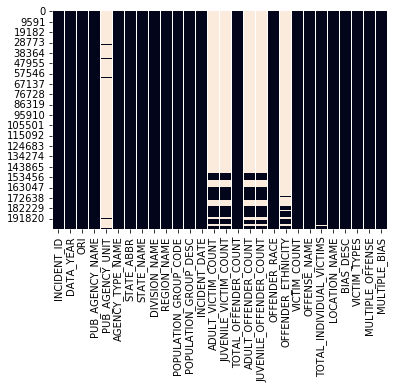

In [7]:
sns.heatmap(hate_crime.isnull(),cbar=False)

That's a lot of null values! Let's start dealing with them--starting with the column with the least amount of null values; OFFENDER_RACE.

In [8]:
hate_crime['OFFENDER_RACE'].isnull().sum()

19

Let's replace "Unknown" in place of all the null values in OFFENDER RACE.

In [9]:
hate_crime['OFFENDER_RACE'].fillna('Unknown',inplace=True)

Checking to see how many null values remain in our OFFENDER_RACE column.

In [10]:
hate_crime['OFFENDER_RACE'].isnull().sum()

0

No more null values! Now we'll take a look at the other columns.

For the purposes of this analysis, we aren't particularly interested in the columns TOTAL INDIVIDUAL VICTIMS,ADULT VICTIM COUNT, ADULT OFFENDER COUNT,JUVENILE OFFENDER COUNT, or JUVENILE VICTIM COUNT because the VICTIM COUNT and TOTAL OFFENDER COUNT columns, which have no null values, already serve those functions.

Therefore, we'll just remove those columns completely rather than wasting time trying to figure out how to consistently populate all those null values.

In [11]:
columns = ['TOTAL_INDIVIDUAL_VICTIMS','ADULT_OFFENDER_COUNT','JUVENILE_OFFENDER_COUNT','ADULT_VICTIM_COUNT','JUVENILE_VICTIM_COUNT']
hate_crime.drop(columns,axis=1,inplace=True)

The OFFENDER_ETHNICITY and PUB_AGENCY_UNIT columns still have null values in them. Let's check these columns out; starting with OFFENDER_ETHNICITY.

In [12]:
hate_crime['OFFENDER_ETHNICITY'].value_counts()

Unknown                   13618
Not Hispanic or Latino     3532
Hispanic or Latino          901
Multiple                     99
Name: OFFENDER_ETHNICITY, dtype: int64

The ethnicities—NOT the races—of those who have committed hate crimes are listed in this column. We can observe from the sparse non-null values in this column that, while some people did choose to reveal their precise ethnic identities, many others just chose to keep their ethnic identities as unknown.

I'm not sure if doing so would make this column relevant to my analysis, even though we could replace all of the null entries in it with the value "Unknown" once more.

Let's examine the proportion of null values in this column.

In [13]:
hate_crime['OFFENDER_ETHNICITY'].isnull().sum()/len(hate_crime['OFFENDER_ETHNICITY'])

0.9098821765316306

90 percent! In other words, if we choose to fill the nulls in this column with the value "Unknown," over 90% of the values would be "Unknown," with only around 10% being Ethnic Identities. Not exactly information that will help with our analysis.

In light of this, we will also remove the OFFENDER ETHNICITY field.

In [14]:
hate_crime.drop('OFFENDER_ETHNICITY',axis=1,inplace=True)

Let's check out the PUB_AGENCY_UNIT column

In [15]:
hate_crime[hate_crime['PUB_AGENCY_UNIT'].isnull()==False]

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
119,96,1991,CO0070500,University of Colorado:,Boulder,University or College,CO,Colorado,Mountain,West,...,26-MAR-91,1,White,1,Destruction/Damage/Vandalism of Property,School/College,Anti-Jewish,Other,S,S
442,346,1991,IL0100700,University of Illinois:,Urbana,University or College,IL,Illinois,East North Central,Midwest,...,03-JUL-91,0,Unknown,2,Intimidation,School/College,Anti-Black or African American,Individual,S,S
965,3145,1991,MD0030400,University of Maryland:,Baltimore County,University or College,MD,Maryland,South Atlantic,South,...,02-FEB-91,0,Unknown,1,Destruction/Damage/Vandalism of Property,School/College,Anti-Black or African American,Government,S,S
1012,533,1991,MD0160300,Maryland-National Capital Park Police:,Montgomery County,Other,MD,Maryland,South Atlantic,South,...,28-JAN-91,0,Unknown,1,Destruction/Damage/Vandalism of Property,Other/Unknown,Anti-Black or African American,Government,S,S
1013,534,1991,MD0160300,Maryland-National Capital Park Police:,Montgomery County,Other,MD,Maryland,South Atlantic,South,...,21-AUG-91,0,Unknown,1,Destruction/Damage/Vandalism of Property,Other/Unknown,Anti-Black or African American,Other,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200963,467516,2018,WAFBISE00,Federal Bureau of Investigation,Seattle,Federal,WA,Washington,Pacific,West,...,19-MAR-18,0,Unknown,1,Arson,Church/Synagogue/Temple/Mosque,Anti-Jehovah's Witness,Religious Organization,S,S
201267,387889,2018,WI0221400,University of Wisconsin:,Platteville,University or College,WI,Wisconsin,East North Central,Midwest,...,12-FEB-18,0,Unknown,1,Destruction/Damage/Vandalism of Property,Residence/Home,Anti-Black or African American,Government,S,S
201304,416621,2018,WIFBIMW00,Federal Bureau of Investigation,Milwaukee,Federal,WI,Wisconsin,East North Central,Midwest,...,18-MAY-18,1,White,1,Intimidation,Church/Synagogue/Temple/Mosque,Anti-Jewish,Individual,S,S
201401,463503,2018,WVWSP2400,State Police:,Madison,State Police,WV,West Virginia,South Atlantic,South,...,31-JAN-18,1,White,1,Intimidation,Residence/Home,Anti-White,Law Enforcement Officer,S,S


This column will also be removed because it contains too many null values to be useful for our study and the data it does contain isn't strictly pertinent.

In [16]:
hate_crime.drop('PUB_AGENCY_UNIT',axis=1,inplace=True)

Confirming the dataframe's head and our null values visualization once more.

In [17]:
hate_crime.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,POPULATION_GROUP_CODE,...,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,City,AR,Arkansas,West South Central,South,5,...,31-AUG-91,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,City,AR,Arkansas,West South Central,South,6,...,19-SEP-91,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,04-JUL-91,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,24-DEC-91,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,City,AR,Arkansas,West South Central,South,3,...,23-DEC-91,1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual,S,S


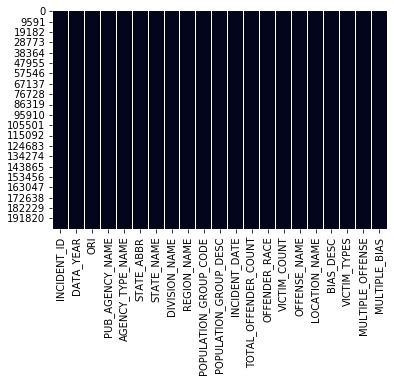

In [18]:
sns.heatmap(hate_crime.isnull(),cbar=False)

All of our null data appears to have been resolved. To be certain, let's check the precise figures once more.

In [19]:
hate_crime.isnull().sum()

INCIDENT_ID              0
DATA_YEAR                0
ORI                      0
PUB_AGENCY_NAME          0
AGENCY_TYPE_NAME         0
STATE_ABBR               0
STATE_NAME               0
DIVISION_NAME            0
REGION_NAME              0
POPULATION_GROUP_CODE    0
POPULATION_GROUP_DESC    0
INCIDENT_DATE            0
TOTAL_OFFENDER_COUNT     0
OFFENDER_RACE            0
VICTIM_COUNT             0
OFFENSE_NAME             0
LOCATION_NAME            0
BIAS_DESC                0
VICTIM_TYPES             0
MULTIPLE_OFFENSE         0
MULTIPLE_BIAS            0
dtype: int64

No more null values exist!

But cleaning is just the beginning; before we begin analysis, we still need to make a few more adjustments to our dataset.

iv. Correcting Datatypes

Let's check our dataset info again

In [20]:
hate_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201403 entries, 0 to 201402
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   INCIDENT_ID            201403 non-null  int64 
 1   DATA_YEAR              201403 non-null  int64 
 2   ORI                    201403 non-null  object
 3   PUB_AGENCY_NAME        201403 non-null  object
 4   AGENCY_TYPE_NAME       201403 non-null  object
 5   STATE_ABBR             201403 non-null  object
 6   STATE_NAME             201403 non-null  object
 7   DIVISION_NAME          201403 non-null  object
 8   REGION_NAME            201403 non-null  object
 9   POPULATION_GROUP_CODE  201403 non-null  object
 10  POPULATION_GROUP_DESC  201403 non-null  object
 11  INCIDENT_DATE          201403 non-null  object
 12  TOTAL_OFFENDER_COUNT   201403 non-null  int64 
 13  OFFENDER_RACE          201403 non-null  object
 14  VICTIM_COUNT           201403 non-null  int64 
 15  

The datatype for the INCIDENT DATE column is set to "Object." But a datetime object is what we want. Fix this, then.

In [ ]:
hate_crime['INCIDENT_DATE'] = pd.to_datetime(hate_crime['INCIDENT_DATE'])

The INCIDENT_DATE column is now set to its proper datatype.

In [22]:
hate_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201403 entries, 0 to 201402
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   INCIDENT_ID            201403 non-null  int64         
 1   DATA_YEAR              201403 non-null  int64         
 2   ORI                    201403 non-null  object        
 3   PUB_AGENCY_NAME        201403 non-null  object        
 4   AGENCY_TYPE_NAME       201403 non-null  object        
 5   STATE_ABBR             201403 non-null  object        
 6   STATE_NAME             201403 non-null  object        
 7   DIVISION_NAME          201403 non-null  object        
 8   REGION_NAME            201403 non-null  object        
 9   POPULATION_GROUP_CODE  201403 non-null  object        
 10  POPULATION_GROUP_DESC  201403 non-null  object        
 11  INCIDENT_DATE          201403 non-null  datetime64[ns]
 12  TOTAL_OFFENDER_COUNT   201403 non-null  int6

v. Renaming Column Headers

To make some of the column heads more conducive to my study, I wish to rename and reformat them. The following will be reformatted:

>Changing all column headers to lowercase
>Renaming the 'BIAS_DESC' column to 'prejudice' to make the contents of the column more clear
>In addition, I will remove a few additional columns from our dataset that I have determined won't be pertinent to my study. The following columns:

    > DIVISION_NAME
    > MULTIPLE_OFFENSE
    > MULTIPLE_BIAS
    > ORI
These particular columns have been targeted for elimination because the information they provide is either too ambiguous for me to utilize, is rendered meaningless by another column, or will simply not assist me answer the problems I wish to address through my analysis.

We'll start by dropping our chosen columns.

In [23]:
cols = ['DIVISION_NAME','MULTIPLE_OFFENSE','MULTIPLE_BIAS','ORI']

In [24]:
hate_crime.drop(cols,axis=1,inplace=True)

In [25]:
hate_crime.head()

,INCIDENT_ID,DATA_YEAR,PUB_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
0,3015,1991,Rogers,City,AR,Arkansas,South,5,"Cities from 10,000 thru 24,999",1991-08-31,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
1,3016,1991,Hope,City,AR,Arkansas,South,6,"Cities from 2,500 thru 9,999",1991-09-19,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,43,1991,Pine Bluff,City,AR,Arkansas,South,3,"Cities from 50,000 thru 99,999",1991-07-04,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual
3,44,1991,Pine Bluff,City,AR,Arkansas,South,3,"Cities from 50,000 thru 99,999",1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
4,3017,1991,Pine Bluff,City,AR,Arkansas,South,3,"Cities from 50,000 thru 99,999",1991-12-23,1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual


Now that our chosen columns have been dropped, let's rename the ones we've kept!

In [26]:
new_col_names = {'INCIDENT_ID':'incident_id',
             'DATA_YEAR':'incident_year',
             'PUB_AGENCY_NAME':'pub_agency_name',
             'AGENCY_TYPE_NAME':'agency_type_name',
             'STATE_ABBR':'state_abbr',
             'STATE_NAME':'state_name',
             'REGION_NAME':'region_name',
             'POPULATION_GROUP_CODE':'population_group_code',
             'POPULATION_GROUP_DESC':'population_group_description',
             'INCIDENT_DATE':'incident_date',
             'TOTAL_OFFENDER_COUNT':'offender_count',
             'OFFENDER_RACE':'offender_race',
             'VICTIM_COUNT':'victim_count',
             'OFFENSE_NAME':'offense_type',
             'LOCATION_NAME':'location_type',
             'BIAS_DESC':'prejudice',
             'VICTIM_TYPES':'victim_types'}
hate_crime.rename(columns=new_col_names,inplace=True)

In [27]:
hate_crime.head()

,incident_id,incident_year,pub_agency_name,agency_type_name,state_abbr,state_name,region_name,population_group_code,population_group_description,incident_date,offender_count,offender_race,victim_count,offense_type,location_type,prejudice,victim_types
0,3015,1991,Rogers,City,AR,Arkansas,South,5,"Cities from 10,000 thru 24,999",1991-08-31,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
1,3016,1991,Hope,City,AR,Arkansas,South,6,"Cities from 2,500 thru 9,999",1991-09-19,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,43,1991,Pine Bluff,City,AR,Arkansas,South,3,"Cities from 50,000 thru 99,999",1991-07-04,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual
3,44,1991,Pine Bluff,City,AR,Arkansas,South,3,"Cities from 50,000 thru 99,999",1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
4,3017,1991,Pine Bluff,City,AR,Arkansas,South,3,"Cities from 50,000 thru 99,999",1991-12-23,1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual


Our columns have been successfully reformatted; now we move on to the Analyze (and Share) phases!

# Analysis

It's time to examine our data using visuals that will help us evaluate it and find the answers to our queries.

In order to conduct this research, we must first establish a new dataframe containing information on Hate Crimes exclusively. Anti-Lesbian, Gay, Bisexual, or Transgender prejudices, Anti-Black or African American prejudices, Anti-Jewish prejudices, Anti-Asian prejudices, Anti-Hispanic or Latino prejudices, Anti-Other Race/Ethnicity/Ancestry prejudices (Mixed Group), Anti-Muslim (Muslim), Anti-White, Anti-American Indian/Alaska Native

For the sake of this Case Study, this is done to make it possible to analyze and visualize our dataset. If I attempted to visualize every form of prejudice recorded in this dataset, my vizualizations would be cluttered and difficult to understand.

Let's create our new dataframe.

In [28]:
#Dataset that only shows data for the big racial/identity groups
crime_data = hate_crime[(hate_crime['prejudice'] == 'Anti-Black or African American') 
         | (hate_crime['prejudice'] == 'Anti-Jewish') 
         | (hate_crime['prejudice'] == 'Anti-Hispanic or Latino')
         | (hate_crime['prejudice'] == 'Anti-White') 
         | (hate_crime['prejudice'] == 'Anti-Asian')
         | (hate_crime['prejudice'] == 'Anti-Gay (Male)') 
         | (hate_crime['prejudice'] == 'Anti-Islamic (Muslim)')
         | (hate_crime['prejudice'] == 'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)') 
         | (hate_crime['prejudice'] == 'Anti-Other Race/Ethnicity/Ancestry') 
         | (hate_crime['prejudice'] == 'Anti-Lesbian (Female)') 
         | (hate_crime['prejudice'] == 'Anti-American Indian/Alaska Native')]

Check the head of the crime_data dataframe, and the prejudice column.

In [29]:
crime_data.head()

,incident_id,incident_year,pub_agency_name,agency_type_name,state_abbr,state_name,region_name,population_group_code,population_group_description,incident_date,offender_count,offender_race,victim_count,offense_type,location_type,prejudice,victim_types
0,3015,1991,Rogers,City,AR,Arkansas,South,5,"Cities from 10,000 thru 24,999",1991-08-31,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
1,3016,1991,Hope,City,AR,Arkansas,South,6,"Cities from 2,500 thru 9,999",1991-09-19,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
2,43,1991,Pine Bluff,City,AR,Arkansas,South,3,"Cities from 50,000 thru 99,999",1991-07-04,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual
3,44,1991,Pine Bluff,City,AR,Arkansas,South,3,"Cities from 50,000 thru 99,999",1991-12-24,1,Black or African American,2,Aggravated Assault;Destruction/Damage/Vandalis...,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual
4,3017,1991,Pine Bluff,City,AR,Arkansas,South,3,"Cities from 50,000 thru 99,999",1991-12-23,1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual


Perfect. Let's now attempt to respond to the initial query we made on our dataset.

# Question 1: How has the rate of hate crimes behaved in America from 1991-2018? Has it increased? Decreased?

We must sort the information in our DataFrame according to how many hate crimes are recorded annually in order to find the answer to this question. This new dataframe will be known as "by year."

In [30]:
by_year = crime_data.groupby('incident_year').count()
by_year.head()

,incident_id,pub_agency_name,agency_type_name,state_abbr,state_name,region_name,population_group_code,population_group_description,incident_date,offender_count,offender_race,victim_count,offense_type,location_type,prejudice,victim_types
incident_year,,,,,,,,,,,,,,,,
1991,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297,4297
1992,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286,6286
1993,7184,7184,7184,7184,7184,7184,7184,7184,7184,7184,7184,7184,7184,7184,7184,7184
1994,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595
1995,7403,7403,7403,7403,7403,7403,7403,7403,7403,7403,7403,7403,7403,7403,7403,7403


The precise number of hate crimes registered each year is now in our dataset, which is perfect.

Let's plot this data on a line to visualize it.

Text(0, 0.5, 'Total Reported Hate Crimes')

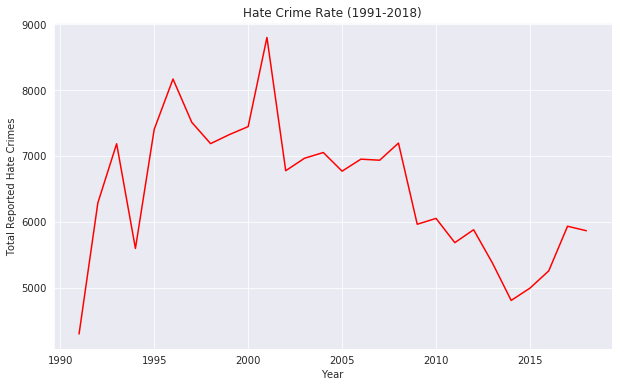

In [32]:
sns.set_style('darkgrid') # setting the style of our data vizualizations to make them more appealing
plt.figure(figsize=(10,6))
sns.lineplot(data=by_year,x=by_year.index,y='prejudice',color='red')
plt.title("Hate Crime Rate (1991-2018)")
plt.xlabel('Year')
plt.ylabel('Total Reported Hate Crimes')

We can deduce from the line plot that, between 1991 and 1992, hate crimes in America increased on average.

Then, in 1993, the rate of hate crimes started to sharply fall before exploding in the years 1994–1996.

A slight reduction in hate crime rates from 1996 to 1998 was followed by an increase that peaked in 2001, the year with the most hate crime reports overall in this analysis.

Following 2001, there was a sharp decline in the number of reported hate crimes, which persisted until 2014, when it started to rise once more.

Let's try to answer our second question next.

# Question 2: What types of hate crimes were most common from 1991-2018?

In order to respond to this query, we first determined the overall frequency of each form of hate crime in our offense type field. We'll take a look at the top 10 most typical categories of hate crimes.

In [33]:
#Dividing our column by the total number of values in it to get the percentage proportion of each value.
crime_data['offense_type'].value_counts().head(10)/len(crime_data['offense_type'])

Intimidation                                             0.302440
Destruction/Damage/Vandalism of Property                 0.298614
Simple Assault                                           0.195374
Aggravated Assault                                       0.108966
Robbery                                                  0.018032
Burglary/Breaking & Entering                             0.011370
Destruction/Damage/Vandalism of Property;Intimidation    0.008875
All Other Larceny                                        0.005616
Arson                                                    0.004768
Intimidation;Simple Assault                              0.004421
Name: offense_type, dtype: float64

Intimidation, Destruction/Damage/Vandalism of Property, Simple Assault, and Aggravated Assault account for almost 90% of the data in this column, making them the most prevalent categories of hate crimes from 1991 to 2018.

Robbery, Burglary/B&E, and different other hate crimes make up the remaining percentage of reported hate crime types.

Instead of excluding the remaining % from our data visualization, we'll combine it by modifying its values to "Robbery/B&E/Other." This would enable us to meaningfully examine and visualize the remaining reports on various hate crimes without overwhelming our data visualization.

To do this, we will first develop a function that verifies that a crime does not fall within one of the top four reported offense categories. If so, nothing is altered by the function. If not, it will set that offense type's value to "Robbery/B&E/Other."

In [34]:
top_four = ['Intimidation','Destruction/Damage/Vandalism of Property','Simple Assault','Aggravated Assault']
def crime_check(crime):
    if crime in top_four:
        return crime
    else:
        return 'Robbery/B&E/Other'

Now let's make a new dataframe with the same values as crime_data and use the crime check function on the column labeled "offense type." This dataframe will be known as "most common hate crimes."

In [35]:
most_common_hate_crimes = crime_data
most_common_hate_crimes['offense_type'] = most_common_hate_crimes['offense_type'].apply(crime_check)

/tmp/ipykernel_20109/897458047.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



To verify that our changes were accepted, let's look at the offense type column's value count in our new dataframe.

In [36]:
most_common_hate_crimes['offense_type'].value_counts()

Intimidation                                54931
Destruction/Damage/Vandalism of Property    54236
Simple Assault                              35485
Aggravated Assault                          19791
Robbery/B&E/Other                           17183
Name: offense_type, dtype: int64

It succeeded!

We can now see all of our data using a countplot to better understand how prevalent each form of hate crime actually is. This is because all of our data is now accurately represented in our dataframe.

Text(0.5, 1, 'Total Hate Crimes per Offense Type (1991-2018)')

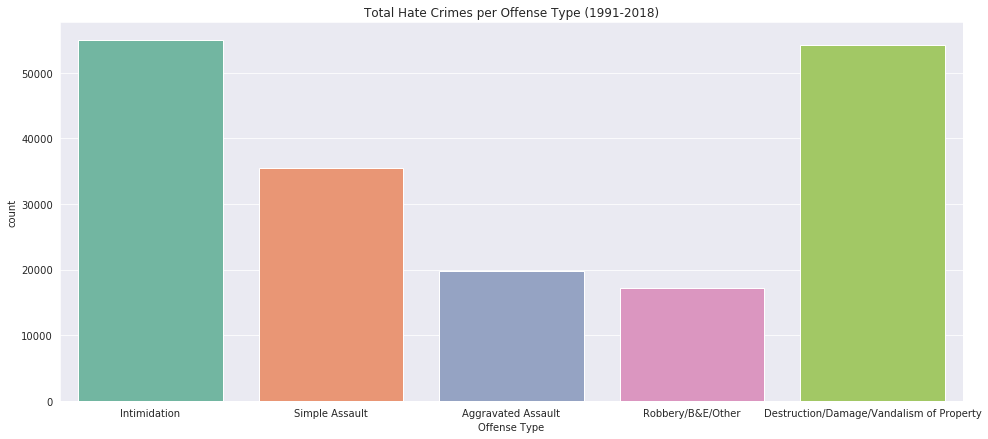

In [37]:
plt.figure(figsize=(14,6))
sns.countplot(data=most_common_hate_crimes,x='offense_type',palette='Set2')
plt.tight_layout()
plt.xlabel('Offense Type')
plt.title('Total Hate Crimes per Offense Type (1991-2018)')

According to this graph, the two most common types of hate crimes out of the five covered in our dataset are intimidation and destruction/damage/vandalism of property, with simple assault and aggravated assault coming in third and fourth, respectively. The remaining hate crimes documented from 1991 to 2018 were classified as robberies, break-ins, or other different kinds of hate crimes.

Let's take this visualization a step further by seeing any preconceptions that are often the driving forces behind each kind of violation.

Text(0.5, 33.0, 'Offense Type')

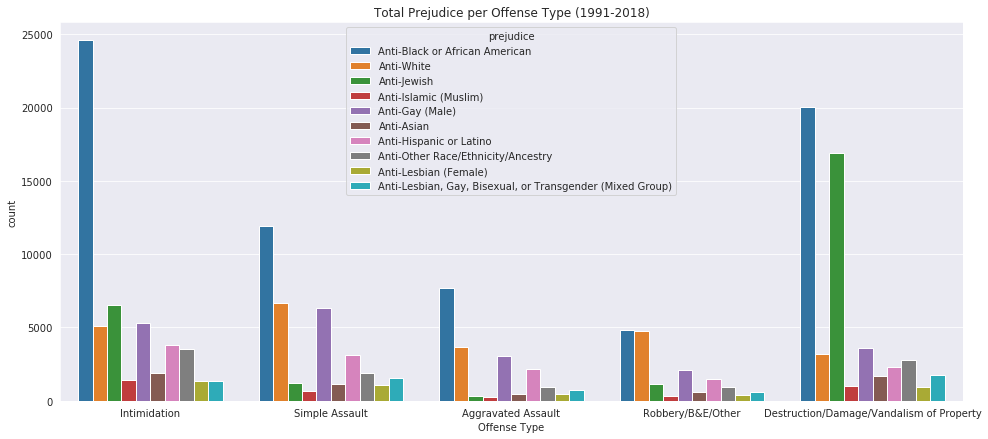

In [38]:
plt.figure(figsize=(14,6))
sns.countplot(data=most_common_hate_crimes,x='offense_type',hue='prejudice')
plt.tight_layout()
plt.title("Total Prejudice per Offense Type (1991-2018)")
plt.xlabel("Offense Type")

The total number of hate crimes spurred by each type of prejudice for each category of hate crime is represented in this graph.

When I look at it, several things come to mind:

Intimidation and destruction/damage/vandalism of property are the most frequent types of hate crimes motivated by this prejudice (>=20,000 recorded instances), accounting for the majority of each category of hate crime.

The majority of hate crimes against Jews fall into the "Destruction/Damage/Vandalism of Property" and "Intimidation" categories, with a significant number of these crimes (>15,000 reported incidents) being motivated by anti-Jewish prejudices as well as a sizeable number (>5000 reported incidents) of intimidation crimes.

The LGBT community experiences significant harm from all four categories of hate crimes, with prejudices against gay men, lesbian women, and mixed-group LGBT people making up a sizable share of each category.

Intimidation, Simple Assault, and Robbery/B&E/Other are the most frequent types of hate crimes motivated by this prejudice, which account for a sizable portion of all hate crimes.

Anti-Hispanic or Latino prejudices are often the driving force behind intimidation, simple assault, aggravated assault, and destruction/damage/vandalism of property hate crimes.

# Question 3: How many hate crimes were committed against each group from 1991-2018?

By building a countplot that tracks the overall number of hate crimes inspired by each type of prejudice, we may provide an answer to this question.

Text(0.5, 0, 'Prejudice')

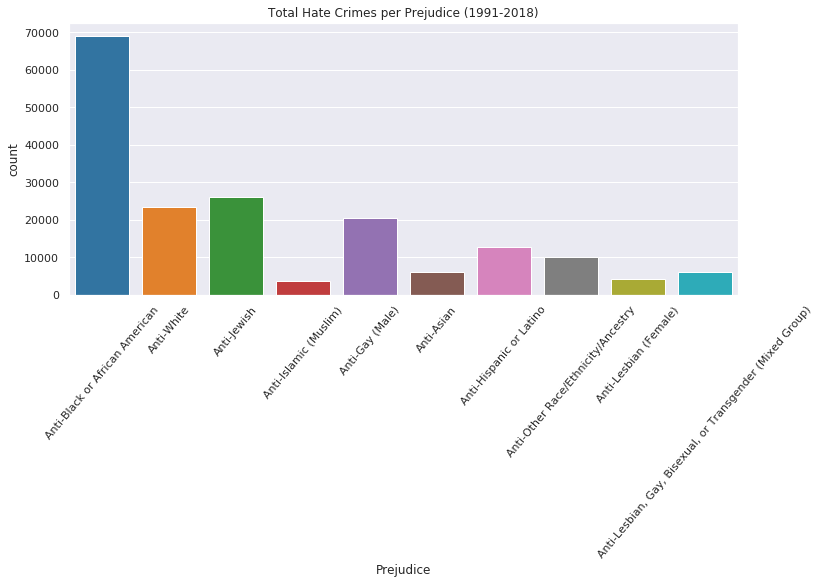

In [39]:
plt.figure(figsize=(12,5))
sns.set_context('notebook',font_scale=1)
sns.countplot(data=crime_data,x='prejudice')
plt.xticks(rotation=50)
plt.title("Total Hate Crimes per Prejudice (1991-2018)")
plt.xlabel("Prejudice")

The total number of hate crimes for each bias is displayed in this graph. Anti-Black or African-American prejudice was the main driver of hate crimes, accounting for nearly 70,000 reported cases, followed by anti-Jewish prejudice (over 25,000), anti-White prejudice (over 20,000), anti-Gay (Male) prejudice (20,000), and anti-Hispanic or Latino prejudice (over 10,000 reported incidents)

By visualizing the racial backgrounds of the perpetrators of the hate crimes on a different countplot, we may take this visualization a step further.

Text(0.5, 0, 'Prejudice')

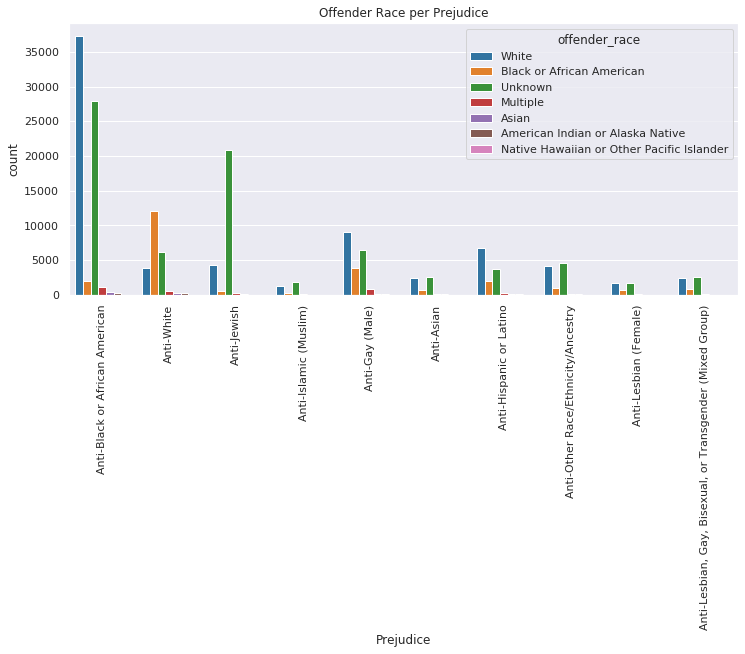

In [40]:
plt.figure(figsize=(12,5))
sns.set_context('notebook',font_scale=1)
sns.countplot(data=crime_data,x='prejudice',hue='offender_race')
plt.xticks(rotation=90)
plt.title("Offender Race per Prejudice")
plt.xlabel("Prejudice")

The above plot shows us the racial identities of every hate crime offender. At a glimpse, we can see that;

The majority of Anti-Black or African American Hate Crimes are committed by White people or people of unknown racial origin.

The majority of Anti-White hate crimes were committed by Black People, White People, and people of unknown racial origin.

The majority of Anti-Jewish hate crimes were committed by people of unknown racial origin, or White People.

The majority of Anti-Gay (Male) hate crimes were committed by White People, people of unknown racial origin, and Black or African American people.

The majority of Anti-Hispanic or Latino hate crimes were committed by White People, people of unknown racial origin, and Black or African American people

Let's try and find an answer to our fourth question now;

# Question 4: Which presidency administration had the highest/lowest hate crime incidents

To respond to this, we must first construct a function that will verify the incident's year and return the name of the President who served in that capacity at the time.

In [41]:
def president_check(year):
    if year < 1993:
        return 'George H.W Bush'
    elif year < 2001:
        return 'Bill Clinton'
    elif year < 2009:
        return 'George W. Bush'
    elif year < 2017:
        return 'Barack Obama'
    else:
        return 'Donald J. Trump'

Perfect. Now let's use that function on the "incident year" column in our table and save the outcomes in a new column called "administration."

In [42]:
crime_data['administration'] = crime_data['incident_year'].apply(president_check)
crime_data.head()

/tmp/ipykernel_20109/1914128978.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,incident_id,incident_year,pub_agency_name,agency_type_name,state_abbr,state_name,region_name,population_group_code,population_group_description,incident_date,offender_count,offender_race,victim_count,offense_type,location_type,prejudice,victim_types,administration
0,3015,1991,Rogers,City,AR,Arkansas,South,5,"Cities from 10,000 thru 24,999",1991-08-31,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,George H.W Bush
1,3016,1991,Hope,City,AR,Arkansas,South,6,"Cities from 2,500 thru 9,999",1991-09-19,1,Black or African American,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,George H.W Bush
2,43,1991,Pine Bluff,City,AR,Arkansas,South,3,"Cities from 50,000 thru 99,999",1991-07-04,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,George H.W Bush
3,44,1991,Pine Bluff,City,AR,Arkansas,South,3,"Cities from 50,000 thru 99,999",1991-12-24,1,Black or African American,2,Robbery/B&E/Other,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,George H.W Bush
4,3017,1991,Pine Bluff,City,AR,Arkansas,South,3,"Cities from 50,000 thru 99,999",1991-12-23,1,Black or African American,1,Aggravated Assault,Service/Gas Station,Anti-White,Individual,George H.W Bush


It seems to have worked! Let's now look at the overall amount of hate crimes reported by administration.

In [43]:
crime_data[crime_data['administration']=='George H.W Bush']['prejudice'].value_counts().sum()

10583

In [44]:
crime_data[crime_data['administration']=='Bill Clinton']['prejudice'].value_counts().sum()

57810

In [45]:
crime_data[crime_data['administration']=='George W. Bush']['prejudice'].value_counts().sum()

57433

In [46]:
crime_data[crime_data['administration']=='Barack Obama']['prejudice'].value_counts().sum()

44004

In [47]:
crime_data[crime_data['administration']=='Donald J. Trump']['prejudice'].value_counts().sum()

11796

From the aforementioned data, it appears that the Bill Clinton Administration had the highest overall number of hate crimes, but by a very slight margin. The George W. Bush Administration was right behind it.

This is visualisable using a barplot. In order to organize the data in our dataset by each presidential administration and tally the total number of hate crimes registered during each one, we will first build a new dataframe named by administration.

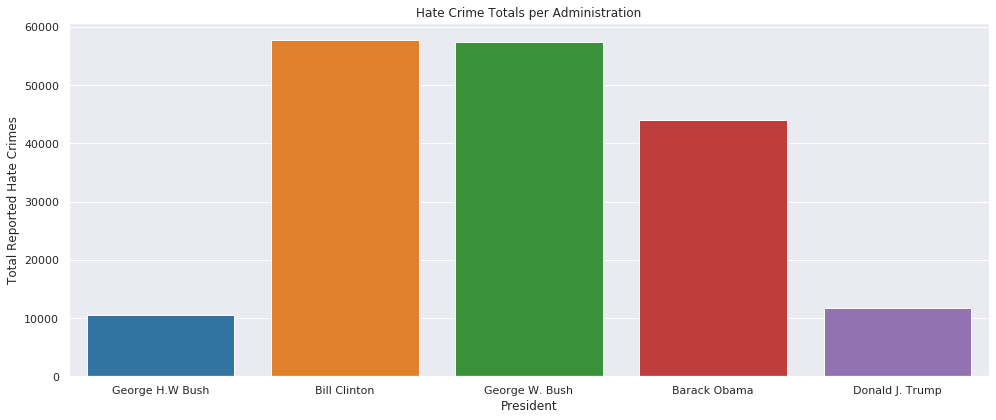

In [48]:
by_administration = crime_data.groupby('administration').count()

#creating our barplot
plt.figure(figsize=(14,6))
sns.barplot(data=by_administration,x=by_administration.index,y='incident_id',order=['George H.W Bush','Bill Clinton','George W. Bush','Barack Obama','Donald J. Trump'])
plt.title("Hate Crime Totals per Administration")
plt.xlabel("President")
plt.ylabel("Total Reported Hate Crimes")
plt.tight_layout()

From most to least, the overall number of documented hate crimes per presidential administration is as follows:

The Bill Clinton Presidency (57,810 reported incidents)

The George W. Bush Presidency (57,433 reported incidents)

Obama, Barack (44,004 reported incidents)

The administration of Donald J. Trump (11,796 reported incidents)

the George H.W. Bush Presidency (10,583 reported incidents)

NOTE: This visualization has some restrictions. Data from the first two years of George H.W. Bush's presidency as well as the last two years of Donald J. Trump's administration are not included in our dataset. The information from these two administrations is therefore lacking. Remember to treat the information about these two administrations with caution.

Now let's move on to our fifth and final question;

# Question 5: Which states--if any--had the highest amount of total hate crimes committed?

By looking up the names of the states with the highest recorded total of hate crimes, we can quickly find the answer to this query.

Let's create a new dataframe first that counts all the reported hate crimes for each state while grouping the dataframe by state.

In [49]:
by_state = crime_data.groupby('state_abbr').count()

by_state.head()

,incident_id,incident_year,pub_agency_name,agency_type_name,state_name,region_name,population_group_code,population_group_description,incident_date,offender_count,offender_race,victim_count,offense_type,location_type,prejudice,victim_types,administration
state_abbr,,,,,,,,,,,,,,,,,
AK,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156,156
AL,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182
AR,913,913,913,913,913,913,913,913,913,913,913,913,913,913,913,913,913
AZ,5530,5530,5530,5530,5530,5530,5530,5530,5530,5530,5530,5530,5530,5530,5530,5530,5530
CA,31040,31040,31040,31040,31040,31040,31040,31040,31040,31040,31040,31040,31040,31040,31040,31040,31040


Let's now look at the states with the most reports of hate crimes. The top ten will be taken.

In [50]:
by_state['incident_id'].nlargest(10)

state_abbr
CA    31040
NY    17794
NJ    17503
MI    10191
MA     9634
OH     7101
TX     6862
WA     6436
AZ     5530
MD     5107
Name: incident_id, dtype: int64

Visualize this data as well as the data from the other 40 states. To do this, we'll use a Choropleth map, a specific type of Python map for showing spatial data.

One tiny adjustment to our dataset is required before we can proceed. Use of 'NE' as the abbreviation for Nebraska as the abbreviation for Nebraska is not recognized, which is 'NB'. As a result, we must rebuild our by state dataframe and give the state abbr column a new name, replacing all instances of "NB" with "NE."

This will be accomplished using the special function nb check, defined below.

In [51]:
def nb_check(abbr):
    if abbr == 'NB':
        return 'NE'
    else:
        return abbr

Let's update our by state dataframe now and use the nb check function on its state abbr column.

In [52]:
by_state = crime_data
by_state['state_abbr'] = by_state['state_abbr'].apply(nb_check)

/tmp/ipykernel_20109/2353229020.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Checking to see if our changes went through.

In [53]:
by_state[by_state['state_abbr']=='NE']

,incident_id,incident_year,pub_agency_name,agency_type_name,state_abbr,state_name,region_name,population_group_code,population_group_description,incident_date,offender_count,offender_race,victim_count,offense_type,location_type,prejudice,victim_types,administration
38113,35759,1996,Buffalo,County,NE,Nebraska,Midwest,8C,"Non-MSA counties from 10,000 thru 24,999",1996-04-04,1,White,1,Simple Assault,Service/Gas Station,Anti-Hispanic or Latino,Individual,Bill Clinton
38114,35760,1996,Norfolk,City,NE,Nebraska,Midwest,5,"Cities from 10,000 thru 24,999",1996-07-19,1,Black or African American,1,Aggravated Assault,Residence/Home,Anti-Black or African American,Individual,Bill Clinton
38115,35761,1996,Norfolk,City,NE,Nebraska,Midwest,5,"Cities from 10,000 thru 24,999",1996-07-21,1,Black or African American,1,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,Bill Clinton
46476,44355,1997,Kearney,City,NE,Nebraska,Midwest,4,"Cities from 25,000 thru 49,999",1997-07-10,0,Unknown,1,Destruction/Damage/Vandalism of Property,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish,Individual,Bill Clinton
46477,44356,1997,Kearney,City,NE,Nebraska,Midwest,4,"Cities from 25,000 thru 49,999",1997-10-05,4,White,4,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Other Race/Ethnicity/Ancestry,Individual,Bill Clinton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197865,476870,2018,Red Willow,County,NE,Nebraska,Midwest,8D,"Non-MSA counties under 10,000",2018-08-23,0,Unknown,2,Robbery/B&E/Other,Field/Woods,Anti-White,Individual;Society/Public,Donald J. Trump
197866,476883,2018,Red Willow,County,NE,Nebraska,Midwest,8D,"Non-MSA counties under 10,000",2018-08-08,0,Unknown,1,Robbery/B&E/Other,Residence/Home,Anti-White,Society/Public,Donald J. Trump
197867,476901,2018,Red Willow,County,NE,Nebraska,Midwest,8D,"Non-MSA counties under 10,000",2018-12-03,0,Unknown,1,Destruction/Damage/Vandalism of Property,Field/Woods,Anti-White,Individual,Donald J. Trump
197868,551591,2018,Red Willow,County,NE,Nebraska,Midwest,8D,"Non-MSA counties under 10,000",2018-04-20,0,Unknown,2,Robbery/B&E/Other,Residence/Home,Anti-White,Individual,Donald J. Trump


Now let's group all the states together and start building out our map.

In [54]:
#Grouping our data together by state abbreviation code
by_state = by_state.groupby('state_abbr').count()

In [55]:
#Defining the data to be used by our choropleth map

data = dict(type = 'choropleth',
            colorscale='RdBu'+'_r',
           locations = by_state.index,
            locationmode = 'USA-states',
           z = by_state['incident_id'],
            text = 'Total Hate Crimes Reported',
           colorbar = {'title':'Total Reported Hate Crimes'})

In [56]:
# Defining the layout
layout = dict(title = 'USA Hate Crimes by State (1991-2018)',
              geo = dict(scope='usa',showlakes = True,lakecolor='rgb(85,173,240)'))

choromap3 = go.Figure(data=[data],layout=layout)

In [57]:
#Launching the plot.
iplot(choromap3)

The graph above shows unequivocally that California had the greatest total number of reported hate crimes from 1991 to 2018 out of all the states. We may mouse over the interactive graphic we created to see the numbers for ourselves, as well as all the other states.


There is no specific course of action or single prescription I could make based on the results of this study that would suddenly decrease the number of prejudice and hate crimes in the United States due to the nature of the dataset's contents. Unfortunately, reality is a little bit more nuanced than that. However, I recommend more research could be made to determine causation for the rise/decline in Hate Crime Rates in America.


# Conclusion

I really hope the results of my analysis were interesting to you. This finishes my FBI Hate Crimes Case Study in the USA.
